<a href="https://colab.research.google.com/github/Jayveersinh-Raj/intro_NLP_tensorflow/blob/main/Intro_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to NLP funtamentals in TensorFlow

* NLP is used to derive information form natural language (Sequences, texts, speeches.

* Another common terms for NLP problems is Sequence to Sequence problems (seq2seq)

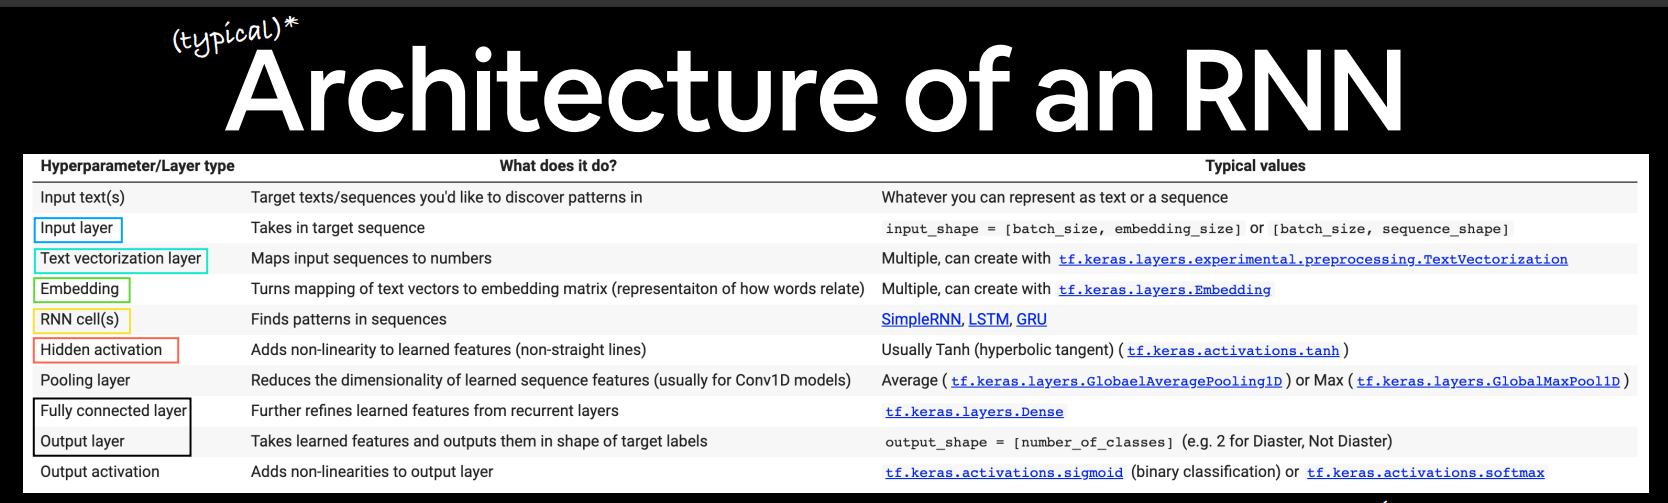

In [1]:
# We will need GPU to work with deep learning tasks such as NLP
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-33203e79-b1db-b975-f0e4-65a2f8c7bbfb)


In [2]:
# For more detailed info use without -L
!nvidia-smi

Mon Aug 29 11:22:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Lets import our helper functions
!wget https://raw.githubusercontent.com/Jayveersinh-Raj/helper_functions/main/helper_functions.py
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-08-29 11:22:51--  https://raw.githubusercontent.com/Jayveersinh-Raj/helper_functions/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10624 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.38K  --.-KB/s    in 0s      

2022-08-29 11:22:51 (122 MB/s) - ‘helper_functions.py’ saved [10624/10624]



# Importing the dataset
Lets use Kaggle's Intro to NLP dataset

It is the text sample of tweets lablled as disasters or not disasters


In [4]:
# Lets get the data from google storage where Daniel has stored it
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data("nlp_getting_started.zip") # This is the name of the zip file that Daniel stored on google

--2022-08-29 11:22:54--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.162.128, 74.125.31.128, 74.125.28.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.162.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.03s   

2022-08-29 11:22:54 (17.6 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



# Visualisation of the data
There are multiple ways:
* Python libraries to read and write files (refer [realpython](https://realpython.com))
* Pandas (But it would take up ram in colab)
* Using tensorflow to load text


In [5]:
import pandas as pd
data_train = pd.read_csv("train.csv")
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# Lets shuffle the data using pandas method
shuffled_train = data_train.sample(frac = 1, random_state = 42) # frac = 1 means 100% of the data shuffle
shuffled_train.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
# Lets see how test looks like
data_test = pd.read_csv("test.csv")
data_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
# Lets shuffle this too
shuffled_test = data_test.sample(frac = 1, random_state = 42) # random state is always use while doing some random activity
shuffled_test.head()

,id,keyword,location,text
2406,8051,refugees,NaN,Refugees as citizens - The Hindu http://t.co/G...
134,425,apocalypse,Currently Somewhere On Earth,@5SOStag honestly he could say an apocalypse i...
411,1330,blown%20up,Scout Team,If you bored as shit don't nobody fuck wit you...
203,663,attack,NaN,@RealTwanBrown Yesterday I Had A Heat Attack ?...
889,2930,danger,Leeds,The Devil Wears Prada is still one of my favou...


In [9]:
# Lets see the value counts to see how many examples we have of each category
shuffled_train.target.value_counts() # Because target contains our categories

0    4342
1    3271
Name: target, dtype: int64

In [10]:
# Lets visualize some random data to get the idea
import random
rand = random.randint(0, len(data_train)-3) # Not to exceed the total length
for i in shuffled_train[["text", "target"]][rand : rand+5 ].itertuples(): # because it will return dataframe as tuples
      _, text, target = i
      print(f"Target : {target}", "real disaster" if target > 0 else "not a diaster")
      print(f"Text : {text} \n")
      print("--- \n")
      

Target : 1 real disaster
Text : #MakeWaterWork Okanagan! Drought rating maxed out - Okanagan Valley http://t.co/tXrBdaUBNN http://t.co/Ue78c7EgOX #WesternCanadaDrought 

--- 

Target : 0 not a diaster
Text : Whether you like it or not everything comes out of the dark be ready for that shit to explode ?? 

--- 

Target : 1 real disaster
Text : Refugio oil spill may have been costlier bigger than projected http://t.co/aP30psZkVx 

--- 

Target : 0 not a diaster
Text : I'm mentally preparing myself for a bomb ass school year if it's not I'm burning buildings ?? 

--- 

Target : 0 not a diaster
Text : @joshsternberg My feed seems to have a deluge once or twice during the week. ItÛªs fantastic. 

--- 



In [11]:
# Lets split the data and get the validation set using sklearn
from sklearn.model_selection import train_test_split
train_lines, val_lines, train_labels, val_labels = train_test_split(shuffled_train["text"].to_numpy(),
                                                                    shuffled_train["target"].to_numpy(), 
                                                                    test_size = 0.1, # 10%
                                                                    random_state = 42)

* to_numpy() creates dataframe as numpy because sklearn requires them to be in numpy form

* Think of the above code as same as we did in linear regression. The 'shuffled_train["text"]" is X, and "shuffled_train["target"]" is Y

In [12]:
# lets check them and their lengths
len(train_lines), len(val_lines), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [13]:
# lets see the first 10 examples
import numpy as np
ten_ex = np.array([train_lines[:10],train_labels[:10]]).T
visual = pd.DataFrame(ten_ex, columns = ["Text", "Target"])

visual

,Text,Target
0,@mogacola @zamtriossu i screamed after hitting...,0
1,Imagine getting flattened by Kurt Zouma,0
2,@Gurmeetramrahim #MSGDoing111WelfareWorks Gree...,1
3,@shakjn @C7 @Magnums im shaking in fear he's g...,0
4,Somehow find you and I collide http://t.co/Ee8...,0
5,@EvaHanderek @MarleyKnysh great times until th...,1
6,destroy the free fandom honestly,1
7,Weapons stolen from National Guard Armory in N...,0
8,@wfaaweather Pete when will the heat wave pass...,1
9,Patient-reported outcomes in long-term survivo...,1


# Converting text to numbers
## Tokenization vs Embedding

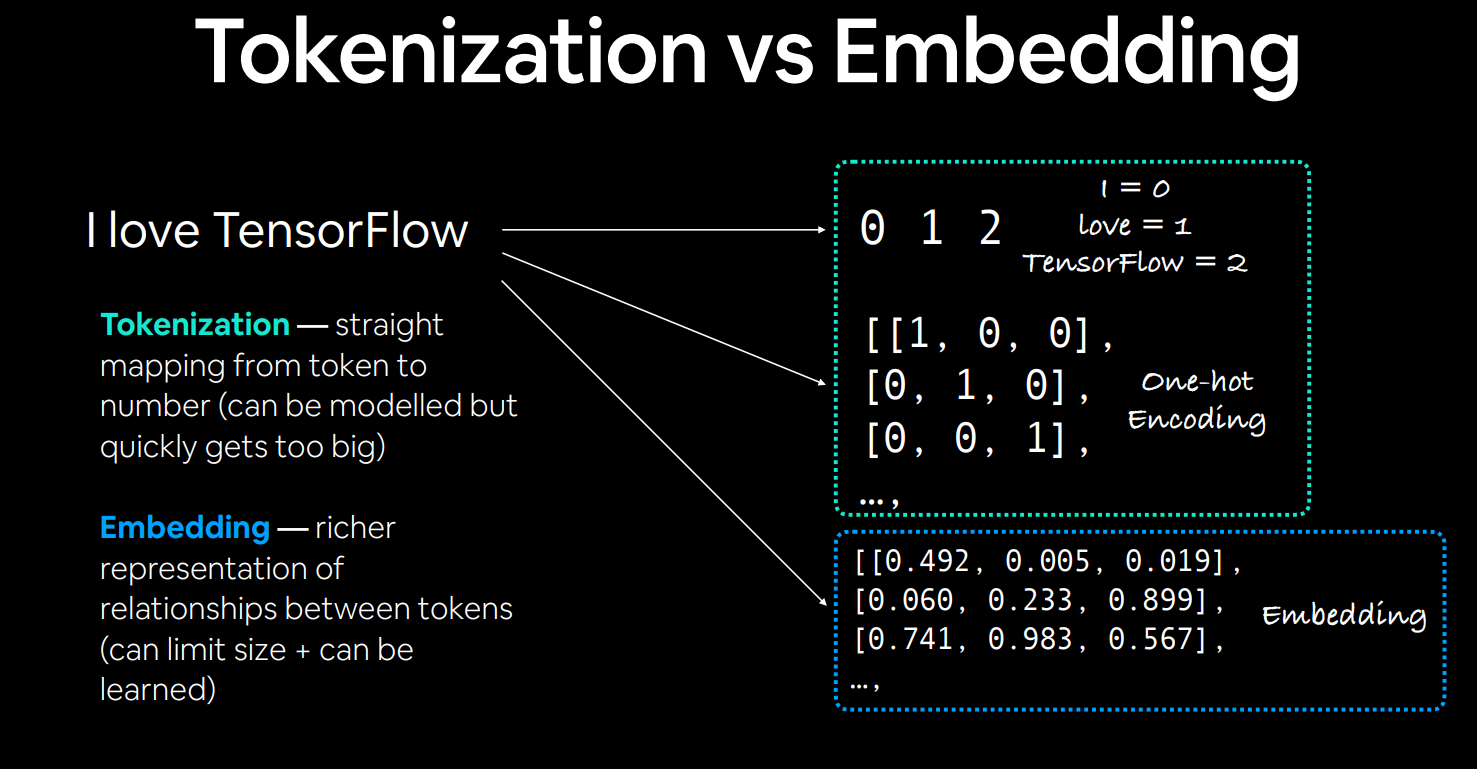

# More on tokenisation and embedding
* ### **Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
1. **Using word-level** tokenization with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token.

2. **Character-level** tokenization, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.

3. **Sub-word** tokenization is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens.

* ### **Embeddings** - An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:
1. **Create your own embedding** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
2. **Reuse a pre-learned embedding** - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

# Tokenization (Text Vectorization)
*tf.keras.layers.TextVectorization*

A preprocessing layer which maps text features to integer sequences.
The processing of each example contains the following steps:

1. Standardize each example (usually lowercasing + punctuation stripping)

2. Split each example into substrings (usually words)

3. Recombine substrings into tokens (usually ngrams)

4. Index tokens (associate a unique int value with each token)

5. Transform each example using this index, either into a vector of ints or a dense float vector.

Here **ngrams** means a vector of how many words, for example 3 would mean a vector containing embeddings for 3 words.


In [14]:
# Lets see first 5 lines
train_lines[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [15]:
# Now lets use text vectorization
from tensorflow.keras.layers import TextVectorization

# Lets use the default text vectorization parameters
text_vector = TextVectorization(max_tokens = 2, #None , # means how many words in the vocabulary, automatically adds <OOV> (Out Of the Vocab.), if 1000 then only picks 1000 common vocab. words
                                standardize = "lower_and_strip_punctuation",
                                split = "whitespace",
                                ngrams = None, # create group of n words, but none means it will treat each word as single entity than grouping
                                output_mode = "int",
                                output_sequence_length = None, # How long do you want your sequence to be
                                pad_to_max_tokens = True) # It will pad/add 0s to shorter tweets to fit

                              # max_tokens are None by default

In [16]:
# Lets find the average length of the tweets
# .split() splits text into words, for example
train_lines[0].split()

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [17]:
# Now lets find the average length
round(sum([len(i.split()) for i in train_lines]) / len(train_lines)) 

15

In [18]:
# Now lets create our hyper parameters
max_vocab = 10000 # we will only consider 10000 common words for vocab
max_len = 15 # we will only consider 15 words at max, because that is the average

text_vector = TextVectorization(max_tokens = max_vocab,
               output_mode = "int",
               output_sequence_length = max_len) # The rest would remain the default

In [19]:
# Now lets adapt the above text_vector to our training lines only, because validate and test are future
text_vector.adapt(train_lines)

In [20]:
# Lets choose a random line from training set and see it, how the text_vector is tokenising it
rand_line = random.choice(train_lines)
print(f"The original tweet: \n {rand_line}")
print(f"\n \n Vectorized/Tokenized: \n {text_vector([rand_line])} ")

The original tweet: 
 #Newswatch: 2 vehicles collided at Lock and Lansdowne Sts in #Ptbo. Emerg crews on their way

 
 Vectorized/Tokenized: 
 [[5048   70 2237  321   17 3669    7 5249 4516    4 4838 5736  689   11
   131]] 


In [21]:
# Now lets see the vocabulary it learned
# Note: Only possible after adapting
vocab_words = text_vector.get_vocabulary()
print(f"Total number of unique words learned: \n {len(vocab_words)}")
print(f"\n Top 5 common words: \n {vocab_words[:5]}")
print(f"\n Least common 5 words: \n {vocab_words[-5:]}")

Total number of unique words learned: 
 10000

 Top 5 common words: 
 ['', '[UNK]', 'the', 'a', 'in']

 Least common 5 words: 
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### UNK means unknown, which is normal

### Total unique words learned are 10000 because that's the max size we set

# Embedding using an Embedding layer
We can use tensorflow's embedding layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters that we care about the most for our embedding layer:
* `input_dim` : The size of our vocabulary
* `output_dim` : The size of the embedding vector, for instance, a value of 50 would mean that each token gets represented by a 50 long vector
* `input_length` : length of the sequences being passed to the embedding layer

In [22]:
from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim = max_vocab, # the size of our vocab.
                      output_dim = 128, # A multiple of 8
                      input_length = max_len) # The size of each input

embedding

🔑 **Note:** Always use the dimensions as multiples of 8 because it makes computations faster. Even having hidden layers too makes it faster sometimes to have as a multiple of 8

In [23]:
# Now lets check our embedding on a random tweet
rand_line = random.choice(train_lines)
print(f"The actual tweet: \n {rand_line}")
print(f"\nThe embedding : \n {embedding(text_vector([rand_line]))}")

The actual tweet: 
 Watch This Airport Get Swallowed Up By A Sandstorm In Under A Minute http://t.co/7IJlZ6BcSP

The embedding : 
 [[[-0.02323964 -0.03889268 -0.00119998 ... -0.03045417  0.01587249
   -0.00704211]
  [ 0.04108489 -0.04240649  0.021747   ... -0.0494346   0.023626
    0.04306221]
  [-0.01506809  0.02770922  0.03920437 ... -0.03168291 -0.00058961
   -0.04139753]
  ...
  [-0.00583813  0.03216764  0.03180257 ...  0.00108124 -0.02936566
   -0.0301604 ]
  [-0.04292374  0.01643583 -0.01418301 ...  0.00279652 -0.03538262
    0.00098977]
  [-0.04532815 -0.04829935 -0.00249053 ...  0.00063298  0.04898364
    0.03848164]]]


🔑 **Note:** Embedding requires to turn the text into positive integers first, that's we have `text_vector([rand_line])` inside of the embedding

# Modelling expermients of a text dataset
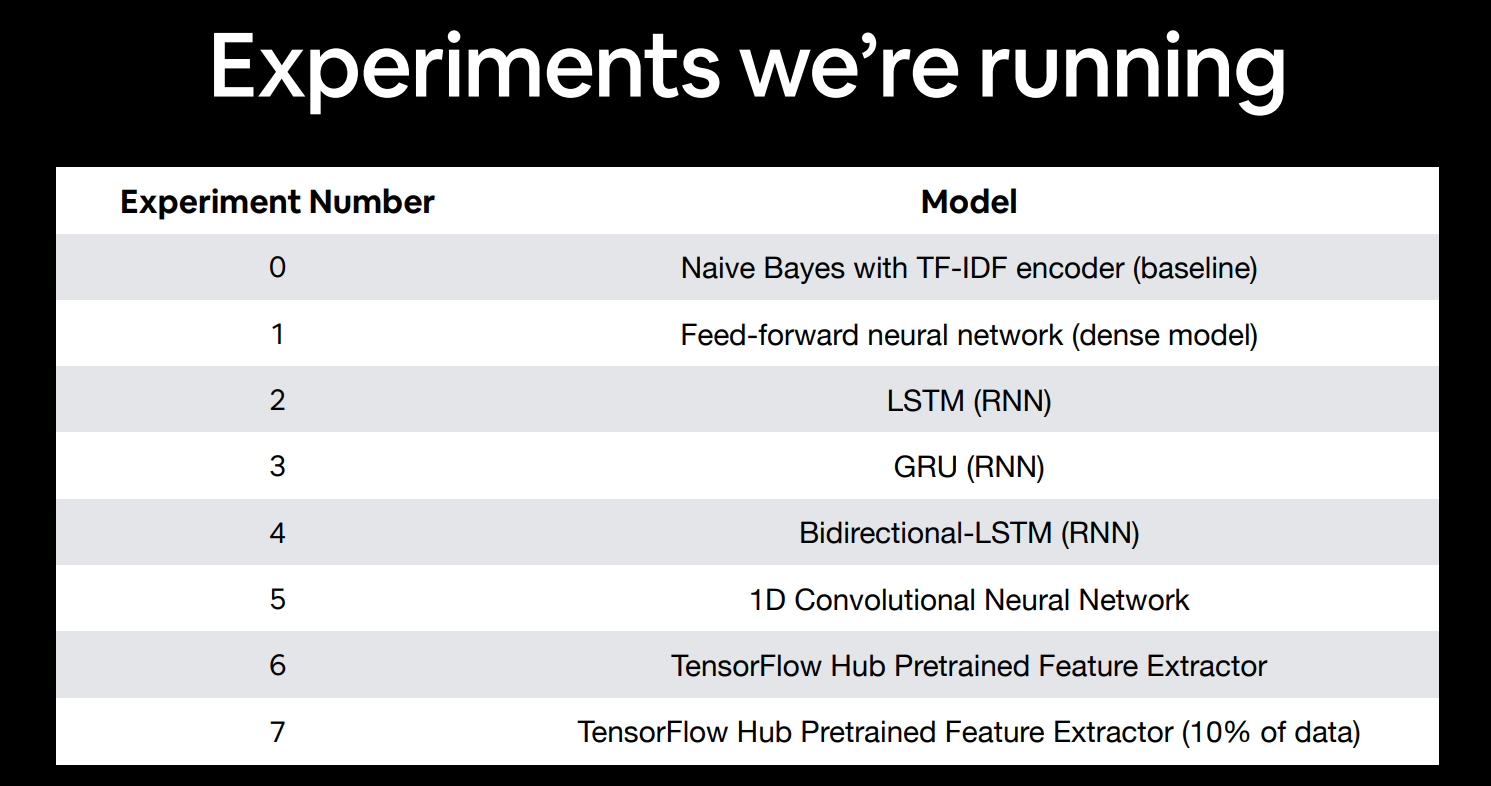

# Model 0 : A baseline
It would be our benchmark, it's important in machine learning to create a baseline/benchmark for future experimentations to build upon.

We'll use Sklearn's **Multinomial Naive Bayes** using **TF_IDF** formula to convert our words to numbers.

🔑 **Note:** It's common practice to implement a non DL model as a baseline because of its speed and then later use DL to improve it if there is a room for improvement.

In [24]:
# Now lets import our libraries and model using Sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline # This is same as Keras's Sequential API

# Create tokenization and modelling pipeline
model_0 = Pipeline([
("tfid", TfidfVectorizer()), # Converts words to numbers using tfidf
("clf", MultinomialNB()) # model the text, "clf" is short for 'classifier', in this case we are using MultinomialNB as classifier
])

# Fit the pipeline to the training data
model_0.fit(train_lines, train_labels) 

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

Sklearn is very similar to tensorflow

In [25]:
# Lets evaluate our baseline model
score = model_0.score(val_lines, val_labels)
print(f"The default evaluation metrices is accuracy, which in this case is: \n {score*100:.2f}%")

The default evaluation metrices is accuracy, which in this case is: 
 79.27%


In [26]:
# We can also make predictions, the same as tensorflow
preds = model_0.predict(val_lines)
preds[:5] # To see just the top 5

array([1, 1, 1, 0, 0])

### Function to evaluate : accuracy, precision, recall, f1-score

In [27]:
# Lets create the function to give us a dictonary of evulation metrices using sklearn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def evaluation_result(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average = 'weighted') # underscore is blank in python, because the function will return 4 values and we need just 3
  evaluation = {"Accuracy" : accuracy*100,
                "Precision" : precision,
                "Recall" : recall,
                "F-score" : fscore}
  return pd.DataFrame.from_dict(evaluation, orient = 'index')

In [28]:
# Lets use the above function to see
model_0_evaluation = evaluation_result(val_labels, preds)
model_0_evaluation

,0
Accuracy,79.265092
Precision,0.811139
Recall,0.792651
F-score,0.786219


# Model_1: A simple dense model

In [29]:
# Creating a tensorboard callback (we need to create a new one for every model)
from helper_functions import create_tensorboard_callback

# Creating a directory to save TensorBoard logs
dir = "model_logs"

In [30]:
# Lets build the model with Functional API (functional is more customizable than sequmtial)
from tensorflow.keras import layers
import tensorflow as tf
inputs = layers.Input(shape = (1,), dtype = tf.string) # inputs are 1 dimensional strings
x = text_vector(inputs) # it turns inputs to numbers
x = embedding(x) # create a learnable embedding of numerical encoding of strings
outputs = layers.Dense(1, activation = "sigmoid")(x) # outpurt layer, wants binary output so sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_simple_dense")

In [31]:
# Lets see the model summary
model_1.summary()

Model: "model_1_simple_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 dense (Dense)               (None, 15, 1)             129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


### There is a problem here: You can see the the last layer does not have a single value output as we want it to be, so to solve it we will need a pooling layer, in tensorflow, we will use `layers.GlobalAveragePooling1d()(x)` or `layers.GlobalMaxPooling1d()(x)` whichever performs the best. 

###1D because it is a 1D data, for image we would have used 2D

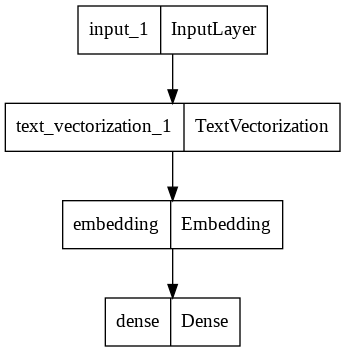

In [32]:
# Lets visualise
tf.keras.utils.plot_model(model_1)

In [45]:
# Lets create again with global pooling layer
inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vector(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector of each token to one vector
outputs = layers.Dense(1, activation = "sigmoid")(x) 
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")

In [34]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

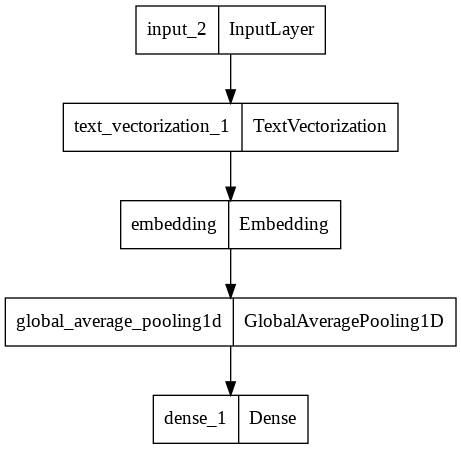

In [35]:
tf.keras.utils.plot_model(model_1)

In [36]:
# Lets compile it
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
# Fit the model
model_1.fit(train_lines, train_labels, epochs = 5, 
            validation_data = (val_lines, val_labels),
            callbacks = [create_tensorboard_callback(dir, "model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220829-112300
Epoch 1/5
215/215 [==============================] - 8s 9ms/step - loss: 0.6112 - accuracy: 0.6941 - val_loss: 0.5340 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4406 - accuracy: 0.8231 - val_loss: 0.4695 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3470 - accuracy: 0.8605 - val_loss: 0.4579 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2838 - accuracy: 0.8948 - val_loss: 0.4654 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2376 - accuracy: 0.9096 - val_loss: 0.4806 - val_accuracy: 0.7874


In [37]:
# Lets evaluate\
model_1.evaluate(val_lines, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.7874


[0.4805533289909363, 0.787401556968689]

In [38]:
# Lets try and predict now
model_1_preds = model_1.predict(val_lines)
model_1_preds = tf.squeeze(tf.round(model_1_preds)) # Squeeze will remove the dimension with value 1 and round will round to 0 if < 0.5 and 1 otherwise
model_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [39]:
model_1_evaluation = evaluation_result(val_labels, model_1_preds)
perfm = model_1_evaluation > model_0_evaluation
perfm

,0
Accuracy,False
Precision,False
Recall,False
F-score,False


In [40]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [41]:
# Lets visualise the word embeddings in projector.tensorflow
# https://www.tensorflow.org/text/guide/word_embeddings using this documentation the following code is written to visualise
weights = model_1.get_layer("embedding").get_weights()[0]
vocab = text_vector.get_vocabulary()

### Write the weights to disk. To use the Embedding Projector, you will upload two files in tab separated format: a file of vectors (containing the embedding), and a file of meta data (containing the words).

In [42]:
# Lets create the file
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [43]:
# Downloading the files from collab
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Recurrent Neural Networks (RNN)
Recurrent Neural Networks are useful for sequential data. 

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.
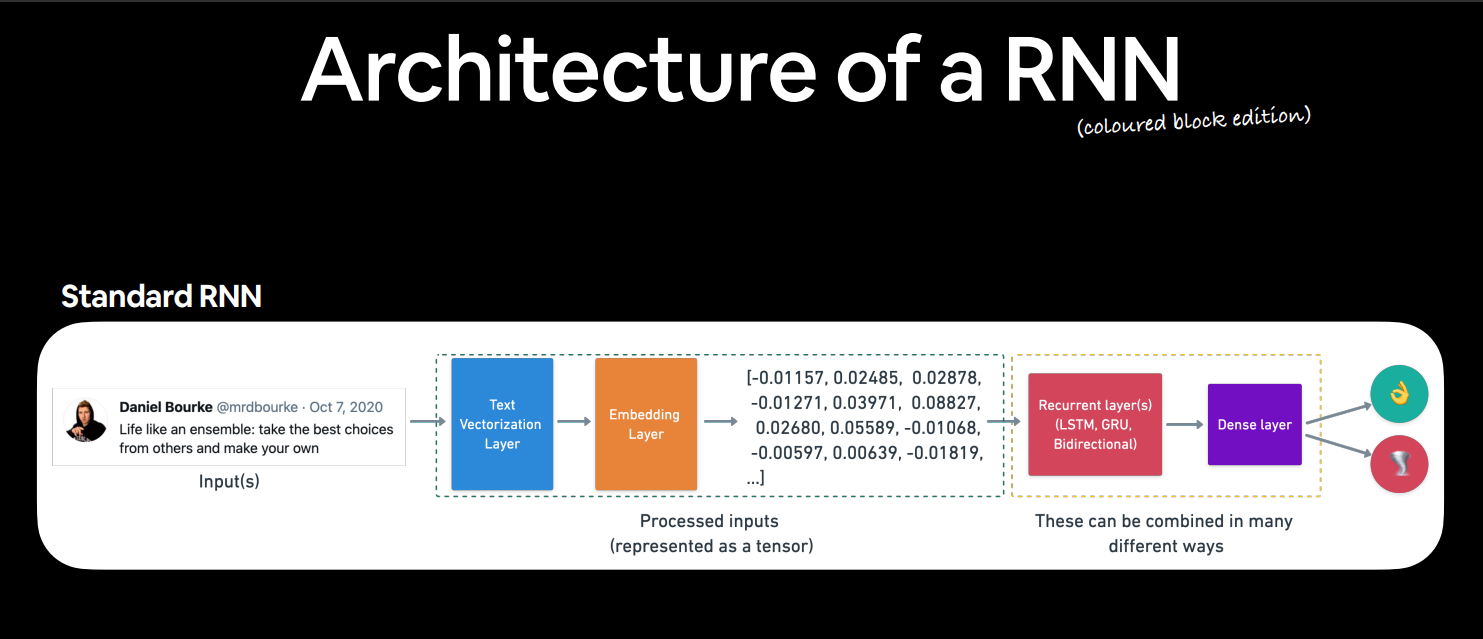

# Model 2: LSTM 
LSTM : Long Short Term Memory (one of the most popular RNN cells)
Our RNN structure would look like below:

` Input (text) -> Tokenize -> Embedding -> Layers (RNNs/Dense) -> Output (Label probability`

In [74]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vector(inputs)
x = embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences = True) (x) # While stacking LSTM cells return_sequences must be true else it will throw error
x = layers.LSTM(64)(x) # Multiple of 8 to make the calculations faster
print(x.shape)
x = layers.Dense(64, activation = "relu")(x)
output = layers.Dense(1, activation = "sigmoid")(x)
model2 = tf.keras.Model(inputs, output, name = "model2_lstm")

(None, 15, 128)
(None, 64)


In [71]:
# Let compile and fit the model
model2.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics = ["accuracy"])

model2.fit(train_lines, train_labels, epochs = 50,
           validation_data = (val_lines, val_labels))

Epoch 1/50
215/215 [==============================] - 4s 11ms/step - loss: 0.1060 - accuracy: 0.9597 - val_loss: 0.9101 - val_accuracy: 0.7546
Epoch 2/50
215/215 [==============================] - 2s 9ms/step - loss: 0.0504 - accuracy: 0.9797 - val_loss: 1.4299 - val_accuracy: 0.7625
Epoch 3/50
215/215 [==============================] - 1s 6ms/step - loss: 0.0392 - accuracy: 0.9838 - val_loss: 1.5942 - val_accuracy: 0.7572
Epoch 4/50
215/215 [==============================] - 1s 7ms/step - loss: 0.0332 - accuracy: 0.9826 - val_loss: 1.5553 - val_accuracy: 0.7598
Epoch 5/50
215/215 [==============================] - 1s 6ms/step - loss: 0.0339 - accuracy: 0.9831 - val_loss: 1.2046 - val_accuracy: 0.7717
Epoch 6/50
215/215 [==============================] - 1s 7ms/step - loss: 0.0465 - accuracy: 0.9794 - val_loss: 1.2600 - val_accuracy: 0.7612
Epoch 7/50
215/215 [==============================] - 1s 7ms/step - loss: 0.0488 - accuracy: 0.9793 - val_loss: 1.2085 - val_accuracy: 0.7559
Epoch

In [72]:
model2.evaluate(val_lines, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 2.1731 - accuracy: 0.7493


[2.1731295585632324, 0.7493438124656677]

In [54]:
model2_preds = model2.predict(val_lines)
model2_preds = tf.squeeze(tf.round(model2_preds)) # If we do not sequeeze we would not be able to use dataframe which is returned by the function
model2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [55]:
model2_eval = evaluation_result(y_true = val_labels, y_pred = model2_preds )
model_1_evaluation < model2_eval

,0
Accuracy,False
Precision,False
Recall,False
F-score,False


## So our lstm is not better than the baseline model or model 1

# The structure of LSTM by default in tensorflow
- ## The defaults values are the best there is, we for now do not want to tweak them a lot, we just add `return_sequences = True` for all the LSTM cells except the last one when stacking them together

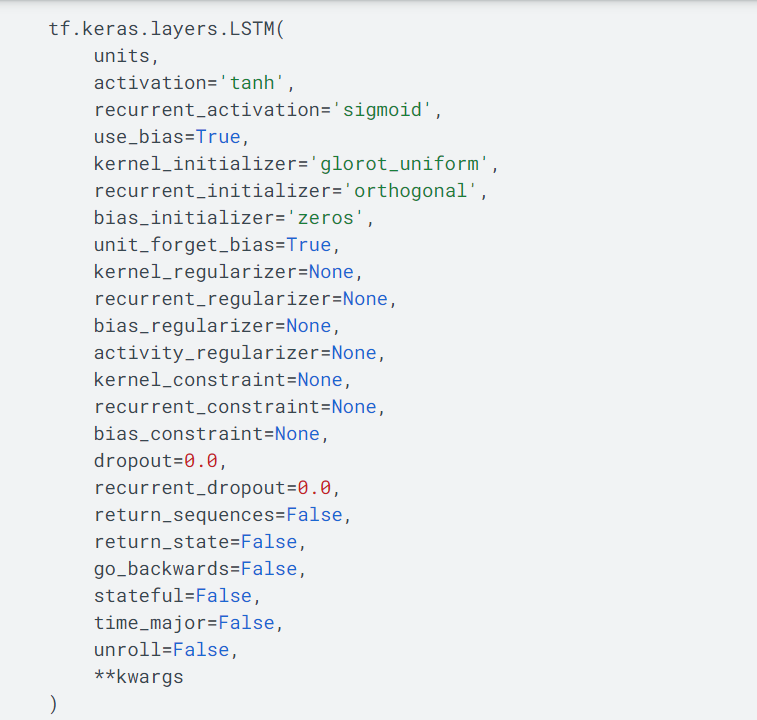

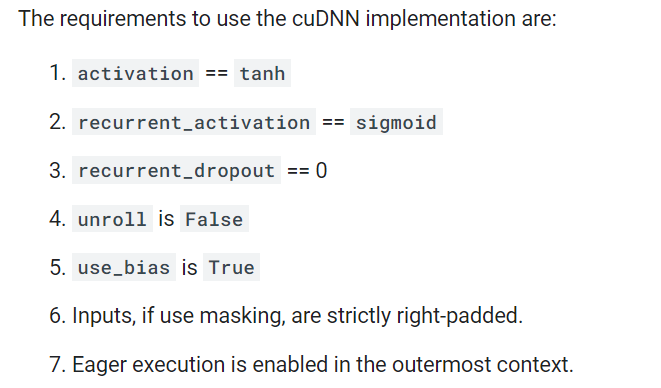



## It is a tensor with 3 dimensions. If you use `x.shape()` with every layer you can see it. Dimensions respectively:
1. `Batch_size`
2. `time_stamp` (in our case each word is an occurance in time)
3. `feature` (the embedded vector)

# The problem with RNN and how LSTM imporves it
There were 2 problems with RNN 1. `vanishing gradiants` 2. `exploading gradients` which LSTM improves by using gates. Use these 2 resources to learn more
1. `MIT Deep Learning course` (YouTube)
2. [how lstm improves RNNs](https://towardsdatascience.com/how-the-lstm-improves-the-rnn-1ef156b75121)

# Model 3: GRU
GRU : Gated recurrent unit, another popular and effective RNN component

To learn more: [GRU_Towards_Data_Science](https://towardsdatascience.com/gru-recurrent-neural-networks-a-smart-way-to-predict-sequences-in-python-80864e4fe9f6)

A GRU has similar features to a LSTM, but less parameters

In [87]:
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = text_vector(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences = True)(x)# Stacking so return_sequences = True
# x = layers.LSTM(64, return_sequences = True)(x) # We can stack an LSTM cell over GRU
# x = layers.GRU(64)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation = "relu")(x)
output = layers.Dense(1, activation = "sigmoid")(x)
model3 = tf.keras.Model(inputs, output, name = "model3_GRU")

## Either you use *Global pooling* to get the right output shapes or you **do not assign**

##`return_sequences = True` in the last GRU cell, here there's only one, so that makes it last by default

In [88]:
model3.summary()

Model: "model3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru_7 (GRU)                 (None, 15, 64)            37248     
                                                                 
 global_average_pooling1d_4   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_29 (Dense)            (None, 64)                4

In [89]:
# Lets compile and fit
model3.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

model3.fit(train_lines, train_labels,
           epochs = 5,
           validation_data = (val_lines, val_labels))

Epoch 1/5
215/215 [==============================] - 3s 8ms/step - loss: 0.1527 - accuracy: 0.9458 - val_loss: 0.8312 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0628 - accuracy: 0.9733 - val_loss: 0.9900 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0462 - accuracy: 0.9778 - val_loss: 1.1394 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0376 - accuracy: 0.9812 - val_loss: 1.3157 - val_accuracy: 0.7546
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0344 - accuracy: 0.9832 - val_loss: 1.4749 - val_accuracy: 0.7598


In [91]:
model3.evaluate(val_lines, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 1.4749 - accuracy: 0.7598


[1.4748767614364624, 0.7598425149917603]

## Even this is not better than the baseline